In [15]:
import time
import numpy as np
import pandas as pd
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

import ringity.generators.geometric_networks as rgeom

## Geometric networks

In [16]:
N = 2**8
d_th = 0.5

nb_radii = 2**4
nb_samples = 2**3

metrics = ['spl', 'cur', 'res', 'bet']
score_df = pd.DataFrame(columns = metrics + ['X'])

t1 = time.time()

for r_in in np.linspace(0, 1, nb_radii):
    tmp_dict = {'spl' : [], 'cur' : [], 'res' : [], 'bet' : [], 'X' : []}
    for _ in range(nb_samples):
        G, X = rgeom.annulus(N, r_in, d_th, return_point_cloud = True)
        
        dgm_spl = rng.pdiagram_from_network(G, metric = 'SPL')
        dgm_cur = rng.pdiagram_from_network(G, metric = 'current_flow')
        dgm_res = rng.pdiagram_from_network(G, metric = 'resistance')
        dgm_bet = rng.pdiagram_from_network(G, metric = 'betweenness')
        
        if len(dgm_res) == 0:
            print('wow')
        
        dgm_X = rng.pdiagram_from_point_cloud(X)
        
        
        tmp_dict['spl'].append(dgm_spl.ring_score())
        tmp_dict['cur'].append(dgm_cur.ring_score())
        tmp_dict['res'].append(dgm_res.ring_score())
        tmp_dict['bet'].append(dgm_bet.ring_score())
        
        tmp_dict['X'].append(dgm_X.ring_score())
        
    s = pd.Series({'spl' : np.mean(tmp_dict['spl']), 
                   'cur' : np.mean(tmp_dict['cur']), 
                   'res' : np.mean(tmp_dict['res']), 
                   'bet' :  np.mean(tmp_dict['bet']),
                  
                   'X' :  np.mean(tmp_dict['X'])})
    score_df.loc[r_in, :] = s
    
t2 = time.time()
print(t2 - t1)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils

476.0036039352417


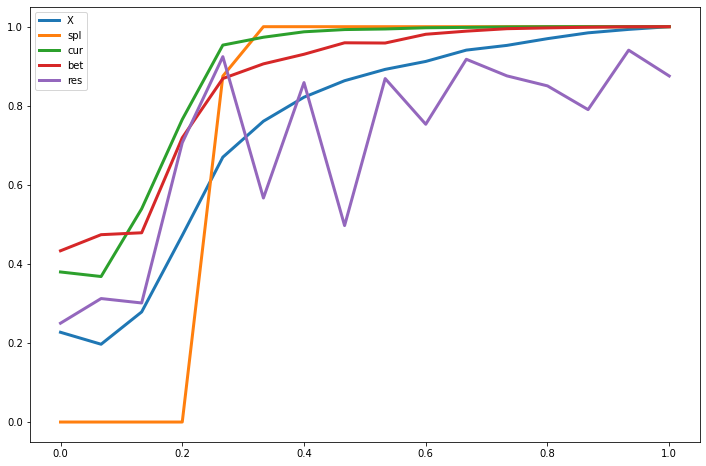

In [20]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(score_df.index, score_df.X, linewidth = 3, label = 'X')
ax.plot(score_df.index, score_df.spl, linewidth = 3, label = 'spl')
ax.plot(score_df.index, score_df.cur, linewidth = 3, label = 'cur')
ax.plot(score_df.index, score_df.bet, linewidth = 3, label = 'bet')
ax.plot(score_df.index, score_df.res, linewidth = 3, label = 'res')

ax.legend()